## Create Models: Logistic Regression and Support Vector Machines(DJ)

### Importing the libraries needed for the project 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer
#from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier


### Loading the dataset

In [2]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns


In [21]:
categoricals = ['CRASH_DATE_EST_I', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE',
                'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
                'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
                'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
                'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 'PHOTOS_TAKEN_I',
                'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
                'MOST_SEVERE_INJURY', 'BEAT_OF_OCCURRENCE']
dtypes = dict.fromkeys(categoricals, 'category')

In [22]:
df = pd.read_csv("../../data/TrafficCrashesChicago.csv", parse_dates = ['CRASH_DATE', 'DATE_POLICE_NOTIFIED'],
                dtype=dtypes)
#data.set_index('CRASH_TYPE', inplace=True)

### Quick look at the data 

#### The inital dimension of the dataset:

In [23]:
df.shape

(377630, 48)

In [24]:
df.head(5)

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2019-07-04 23:05:00,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2019-07-30 10:25:00,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",2019-08-10 17:35:00,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",2019-08-16 16:53:00,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",2019-08-17 18:30:00,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


#### Checking the useablity of variables

In [25]:
row, column = df.shape
df1 = round(((row - df.isnull().sum())/ row) * 100)
df1

RD_NO                            100.0
CRASH_DATE_EST_I                   7.0
CRASH_DATE                       100.0
POSTED_SPEED_LIMIT               100.0
TRAFFIC_CONTROL_DEVICE           100.0
DEVICE_CONDITION                 100.0
WEATHER_CONDITION                100.0
LIGHTING_CONDITION               100.0
FIRST_CRASH_TYPE                 100.0
TRAFFICWAY_TYPE                  100.0
LANE_CNT                          53.0
ALIGNMENT                        100.0
ROADWAY_SURFACE_COND             100.0
ROAD_DEFECT                      100.0
REPORT_TYPE                       98.0
CRASH_TYPE                       100.0
INTERSECTION_RELATED_I            22.0
NOT_RIGHT_OF_WAY_I                 5.0
HIT_AND_RUN_I                     28.0
DAMAGE                           100.0
DATE_POLICE_NOTIFIED             100.0
PRIM_CONTRIBUTORY_CAUSE          100.0
SEC_CONTRIBUTORY_CAUSE           100.0
STREET_NO                        100.0
STREET_DIRECTION                 100.0
STREET_NAME              

##### Checking the duplicates

In [26]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
377625    False
377626    False
377627    False
377628    False
377629    False
Length: 377630, dtype: bool

In [27]:
df['STREET_NAME'].value_counts()

WESTERN AVE              10320
PULASKI RD                8988
CICERO AVE                8165
ASHLAND AVE               8118
HALSTED ST                7136
                         ...  
LAKE SHORE                   1
LA SALLE DR /ILLINOIS        1
OTSEGO AVE                   1
BALDWIN AVE                  1
ST MARY ST                   1
Name: STREET_NAME, Length: 1536, dtype: int64

In [28]:
df['BEAT_OF_OCCURRENCE'].value_counts()  

1834    5546
114     4472
122     4442
1831    4430
813     3829
        ... 
1125     348
422      330
1653     138
1655      59
1652      56
Name: BEAT_OF_OCCURRENCE, Length: 274, dtype: int64

#### Separating the "year" from the "CRASH_DATE" variable column as "year " column

In [30]:
df['year'] = df['CRASH_DATE'].dt.year
df.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,year
0,JC334993,NaN,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2019-07-04 23:05:00,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879),2019
1,JC370822,NaN,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2019-07-30 10:25:00,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377),2019
2,JC387098,NaN,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",2019-08-10 17:35:00,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752),2019
3,JC395195,NaN,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",2019-08-16 16:53:00,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689),2019
4,JC396604,NaN,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",2019-08-17 18:30:00,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802),2019


#### Lets look at the date length of the data set

In [31]:
df.CRASH_DATE.iloc[[1,-1]]

1        2019-07-30 10:22:00
377629   2019-08-20 17:14:00
Name: CRASH_DATE, dtype: datetime64[ns]

### Below are the attributes in the data set and the type

#### Data types

In [32]:
df.dtypes

RD_NO                                    object
CRASH_DATE_EST_I                       category
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                 category
DEVICE_CONDITION                       category
WEATHER_CONDITION                      category
LIGHTING_CONDITION                     category
FIRST_CRASH_TYPE                       category
TRAFFICWAY_TYPE                        category
LANE_CNT                                float64
ALIGNMENT                                object
ROADWAY_SURFACE_COND                   category
ROAD_DEFECT                            category
REPORT_TYPE                            category
CRASH_TYPE                             category
INTERSECTION_RELATED_I                 category
NOT_RIGHT_OF_WAY_I                     category
HIT_AND_RUN_I                          category
DAMAGE                                 category
DATE_POLICE_NOTIFIED             datetim

#### Data attributes(Colmns)

In [34]:
list(df)

['RD_NO',
 'CRASH_DATE_EST_I',
 'CRASH_DATE',
 'POSTED_SPEED_LIMIT',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'LANE_CNT',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_NO',
 'STREET_DIRECTION',
 'STREET_NAME',
 'BEAT_OF_OCCURRENCE',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'NUM_UNITS',
 'MOST_SEVERE_INJURY',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'year']

### Looking at the Numerical and Object variables(Columns) of the raw data set

#### Descriptive statistics within the data set (Numerical)

In [36]:
df.describe(include=['number'])

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,year
count,377630.000000,1.985490e+05,377630.000000,376172.000000,375403.000000,375403.000000,375403.00000,375403.000000,375403.000000,375403.000000,375403.0,377630.000000,377630.000000,377630.000000,375627.000000,375627.000000,377630.000000
mean,28.244758,1.335580e+01,3580.168864,2.020719,0.163496,0.000882,0.01773,0.089070,0.055815,2.025890,0.0,13.180062,4.121158,6.909215,41.858157,-87.671980,2017.797275
std,6.662733,2.965030e+03,2906.301644,0.416721,0.523002,0.032261,0.15566,0.383158,0.301246,1.160255,0.0,5.455058,1.965998,3.454893,0.358471,0.731744,1.113150
min,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.934014,2013.000000
25%,30.000000,2.000000e+00,1199.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.788098,-87.720411,2017.000000
50%,30.000000,2.000000e+00,3100.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.878217,-87.672417,2018.000000
75%,30.000000,4.000000e+00,5500.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924989,-87.632837,2019.000000
max,99.000000,1.191625e+06,451100.000000,18.000000,21.000000,3.000000,7.00000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000,2020.000000


#### Descriptive statistics within the data set (Numerical)

In [39]:
df.describe(include=['category'])

,CRASH_DATE_EST_I,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY
count,28062,377630,377630,377630,377630,377630,377630,377630,377630,368884,377630,83409,17401,104899,377630,377630,377630,377628,377629,377626,4781,7624,1264,2646,2100,617,375396
unique,2,19,8,11,6,18,20,7,7,2,2,2,2,2,3,40,40,4,1536,274,2,2,2,2,4,2,5
top,Y,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,Y,Y,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,W,WESTERN AVE,1834,Y,Y,Y,Y,CONSTRUCTION,Y,NO INDICATION OF INJURY
freq,24356,217363,219376,298351,247573,93358,171443,282400,314890,229370,291294,79491,15902,100355,212956,136519,150493,134826,10320,5546,3729,6200,864,2100,1499,554,329936


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377630 entries, 0 to 377629
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   RD_NO                          377630 non-null  object        
 1   CRASH_DATE_EST_I               28062 non-null   category      
 2   CRASH_DATE                     377630 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             377630 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         377630 non-null  category      
 5   DEVICE_CONDITION               377630 non-null  category      
 6   WEATHER_CONDITION              377630 non-null  category      
 7   LIGHTING_CONDITION             377630 non-null  category      
 8   FIRST_CRASH_TYPE               377630 non-null  category      
 9   TRAFFICWAY_TYPE                377630 non-null  category      
 10  LANE_CNT                       198549 non-null  float64       
 11  

### Reported Vehicle Accidents from 2013 to 2020

In [41]:
fatal = df['INJURIES_FATAL'].sum()
incapacitating= df['INJURIES_INCAPACITATING'].sum()
non_incapacitating = df['INJURIES_NON_INCAPACITATING'].sum()
rnev = df['INJURIES_REPORTED_NOT_EVIDENT'].sum()
nind = df['INJURIES_NO_INDICATION'].sum()
unknown = df['INJURIES_UNKNOWN'].sum()


In [47]:
df = df.set_index('CRASH_DATE').sort_index()
start_date, end_date = df.index[1], df.index[-1]
print("The total death in car crash accidents since the year {}, up to {} is {}.".format(start_date, end_date,fatal))
print("The total number of incapacitating and non-incapacitating injuries are  {}, {} respectively".format(incapacitating,non_incapacitating))
print("The total number of repoted not evident and no indication injuries are  {}, {} respectively".format(rnev,nind))
print("The total number of unknown injuries are  {}".format(unknown))

The total death in car crash accidents since the year 2014-01-18 18:14:00, up to 2020-01-17 00:30:00 is 331.0.
The total number of incapacitating and non-incapacitating injuries are  6656.0, 33437.0 respectively
The total number of repoted not evident and no indication injuries are  20953.0, 760525.0 respectively
The total number of unknown injuries are  0.0


#### Since the total number of unknown injuries are  0.0 we should the remove the column "INJURIES_UNKNOWN"

## Visualizing the data

#### Traffic crash types by the year( Bar charts)

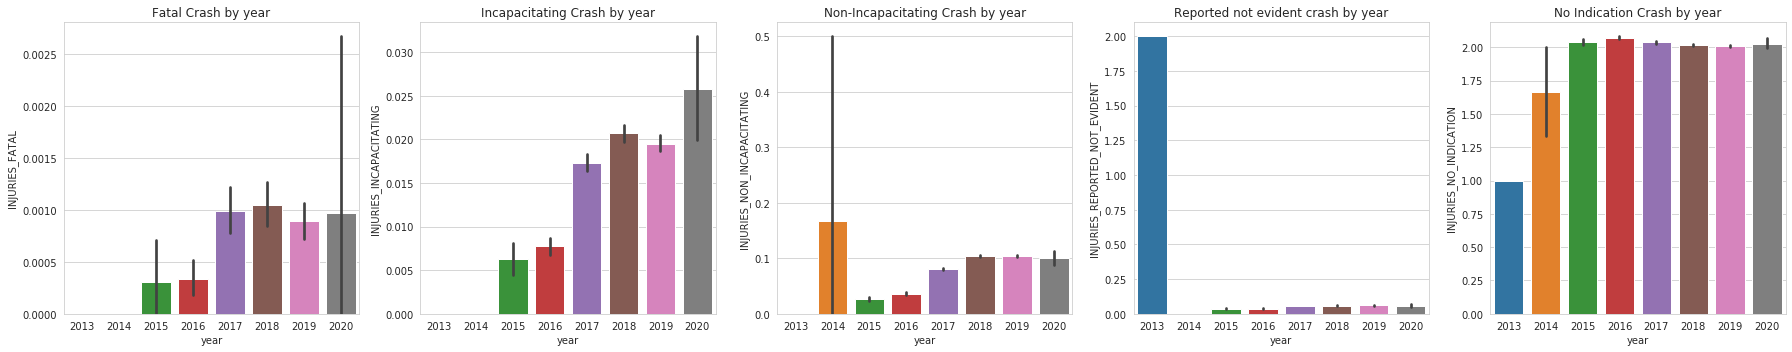

In [48]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.barplot(x="year",y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.barplot(x="year", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.barplot(x="year", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.barplot(x="year", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.barplot(x="year", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('year') for i in range(5)]
plt.tight_layout()
ax[0].set_title('Fatal Crash by year')
ax[1].set_title('Incapacitating Crash by year')
ax[2].set_title('Non-Incapacitating Crash by year')
ax[3].set_title('Reported not evident crash by year')
ax[4].set_title('No Indication Crash by year')
plt.tight_layout()
plt.show()

#### Traffic crash types by the year( Line charts)

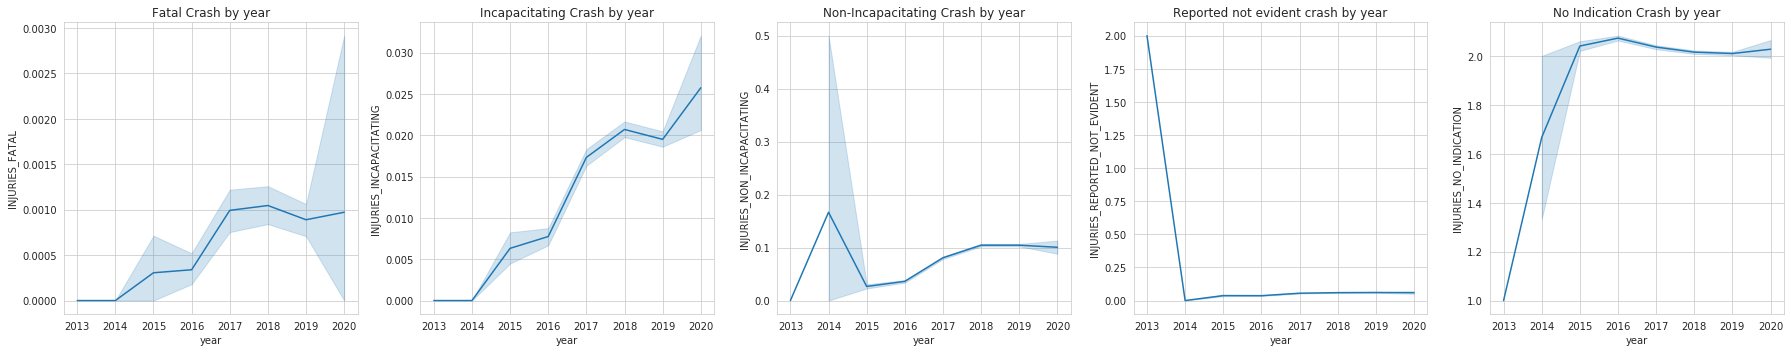

In [49]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.lineplot(x="year",y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.lineplot(x="year", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.lineplot(x="year", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.lineplot(x="year", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.lineplot(x="year", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('year') for i in range(5)]
ax[0].set_title('Fatal Crash by year')
ax[1].set_title('Incapacitating Crash by year')
ax[2].set_title('Non-Incapacitating Crash by year')
ax[3].set_title('Reported not evident crash by year')
ax[4].set_title('No Indication Crash by year')
plt.tight_layout()
plt.show()

#### Traffic crash types by the Month( Bar charts)


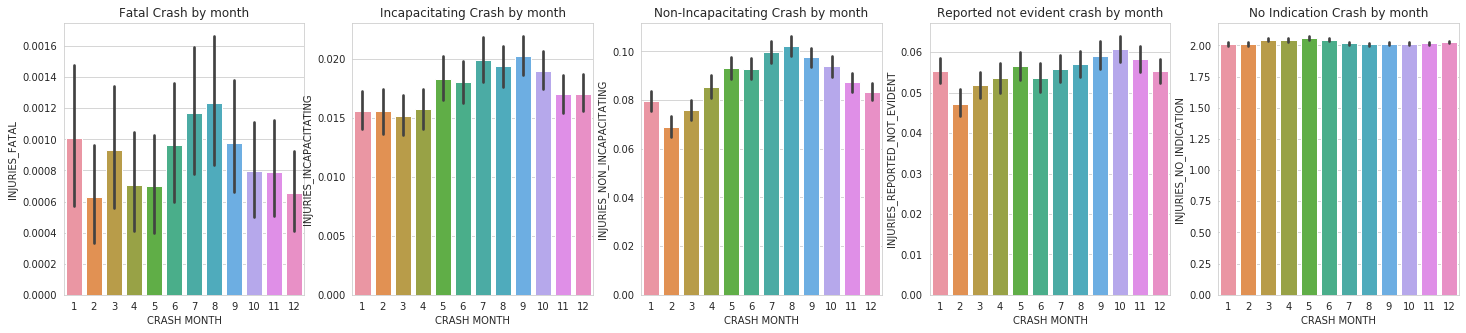

<Figure size 432x288 with 0 Axes>

In [50]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.barplot(x="CRASH_MONTH",y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('CRASH MONTH') for i in range(5)]
ax[0].set_title('Fatal Crash by month')
ax[1].set_title('Incapacitating Crash by month')
ax[2].set_title('Non-Incapacitating Crash by month')
ax[3].set_title('Reported not evident crash by month')
ax[4].set_title('No Indication Crash by month')

plt.show()
plt.tight_layout()

#### Traffic crash types by road type and condition

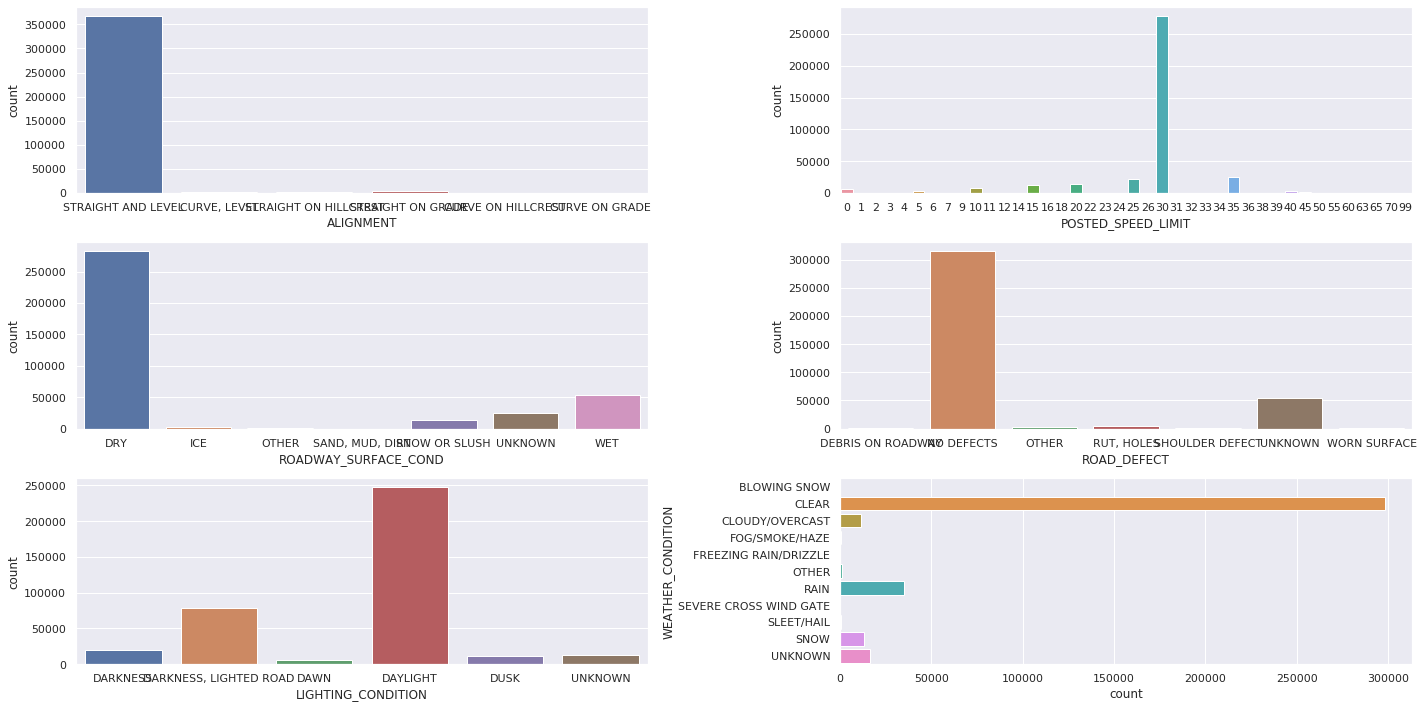

In [51]:
sns.set(font_scale=1) 
fig, ax = plt.subplots(3, 2, figsize = (20, 10));

sns.countplot(x='ALIGNMENT',data=df, ax=ax[0,0]);
sns.countplot(x='POSTED_SPEED_LIMIT',data=df, ax=ax[0,1])
sns.countplot(x='ROADWAY_SURFACE_COND',data=df, ax=ax[1,0])
sns.countplot(x='ROAD_DEFECT',data=df, ax=ax[1,1])
sns.countplot(x='LIGHTING_CONDITION',data=df, ax=ax[2,0])
sns.countplot(y='WEATHER_CONDITION',data=df, ax=ax[2,1])
#[ax[i].set_xlabel('CRASH MONTH') for i in range(5)]
#ax[0].set_title('Road Alignment')
plt.tight_layout()
plt.show()

#### Traffic crash types by trafic Control 

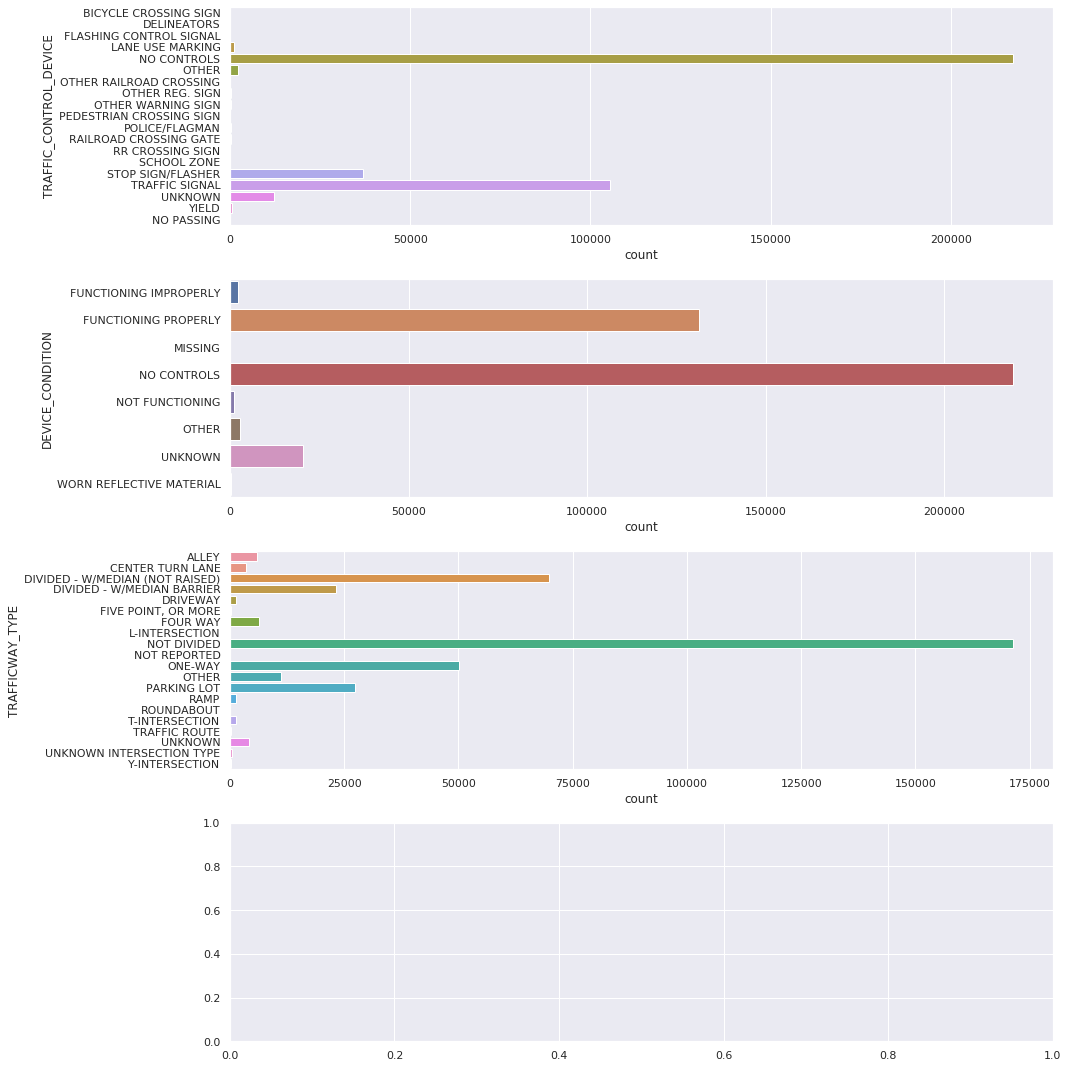

In [52]:
sns.set(font_scale=1) 
fig, ax = plt.subplots(4, figsize = (15, 15));

sns.countplot(y='TRAFFIC_CONTROL_DEVICE',data=df, ax=ax[0]);
sns.countplot(y='DEVICE_CONDITION',data=df, ax=ax[1])
sns.countplot(y='TRAFFICWAY_TYPE',data=df, ax=ax[2])
#sns.countplot(y='LANE_CNT',data=df, ax=ax[3])

plt.tight_layout()

## Visualizing Fatal Crashes and the most related variables

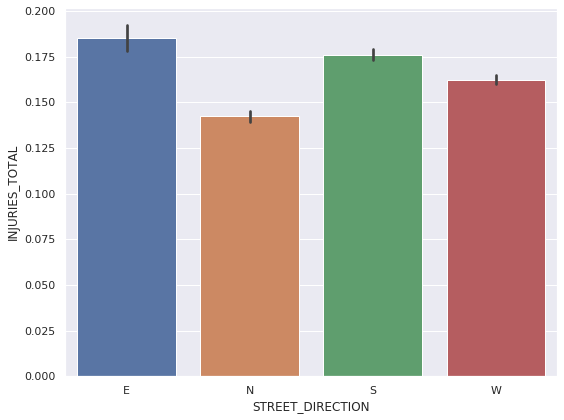

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x="STREET_DIRECTION", y="INJURIES_TOTAL",  data=df);
plt.tight_layout()

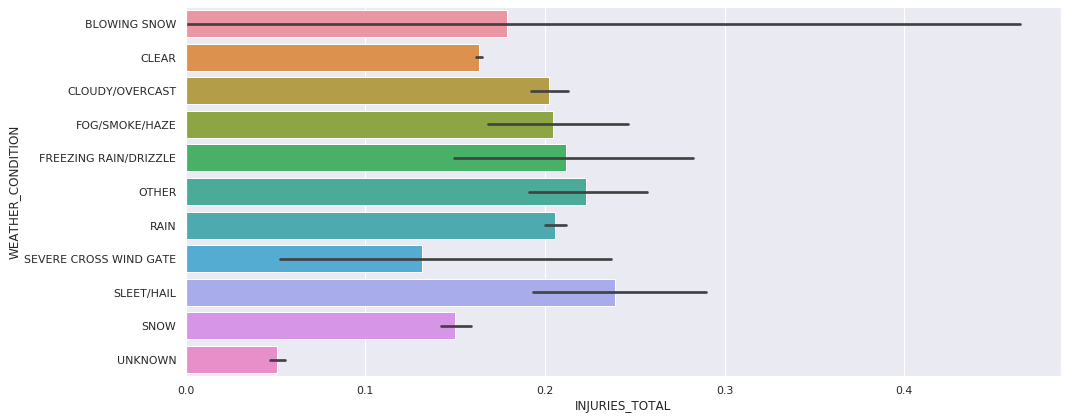

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(y="WEATHER_CONDITION", x="INJURIES_TOTAL",  data=df);
plt.tight_layout()

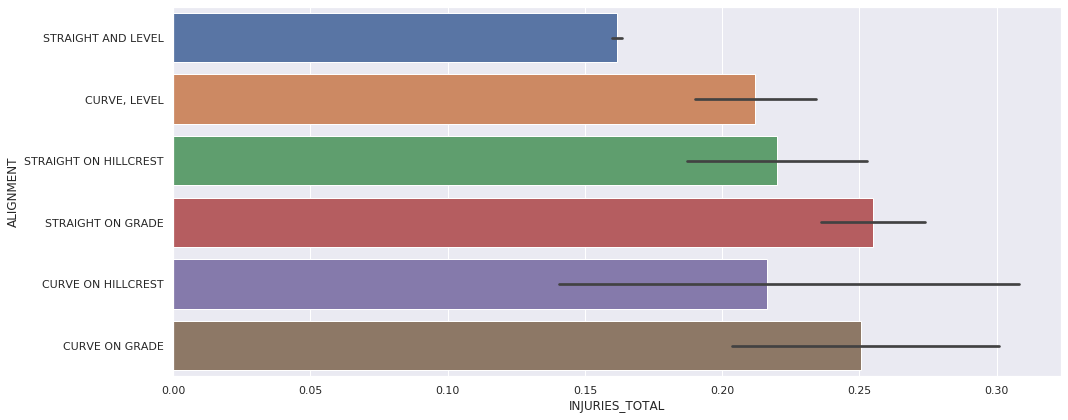

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(y="ALIGNMENT", x="INJURIES_TOTAL",  data=df);
plt.tight_layout()

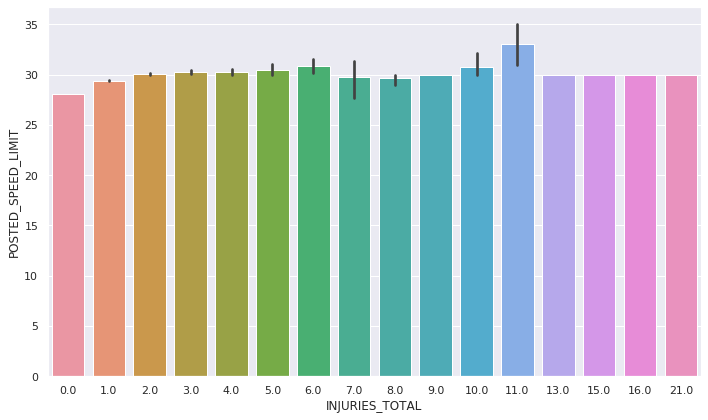

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x="INJURIES_TOTAL", y="POSTED_SPEED_LIMIT",  data=df);
plt.tight_layout()

### Dropping INSIGNIFICANT  columns

In [78]:
# dropping INSIGNIFICANT  columns 
df2 =df.drop(["CRASH_DATE_EST_I", "INTERSECTION_RELATED_I", "NOT_RIGHT_OF_WAY_I","HIT_AND_RUN_I","PHOTOS_TAKEN_I","STATEMENTS_TAKEN_I","DOORING_I", "WORK_ZONE_I","WORK_ZONE_TYPE","WORKERS_PRESENT_I","INJURIES_UNKNOWN",
              "STREET_NAME", 'STREET_NO', 'RD_NO','DATE_POLICE_NOTIFIED','LATITUDE','LONGITUDE','FIRST_CRASH_TYPE','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
            'WEATHER_CONDITION','LIGHTING_CONDITION','LANE_CNT','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','REPORT_TYPE','CRASH_TYPE','DAMAGE','PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','LOCATION','TRAFFICWAY_TYPE','STREET_DIRECTION','STREET_NAME'], axis = 1, inplace = False) 


In [79]:
df2

,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,year
CRASH_DATE,,,,,,,,,,,,,
2013-03-03 16:48:00,30,1712,2.0,2.0,0.0,0.0,0.0,2.0,1.0,16,1,3,2013
2014-01-18 18:14:00,30,121,2.0,0.0,0.0,0.0,0.0,0.0,2.0,18,7,1,2014
2014-01-21 07:40:00,30,334,2.0,1.0,0.0,0.0,1.0,0.0,1.0,7,3,1,2014
2014-02-24 19:45:00,30,1222,2.0,0.0,0.0,0.0,0.0,0.0,2.0,19,2,2,2014
2014-06-25 19:00:00,30,1031,2.0,0.0,0.0,0.0,0.0,0.0,2.0,19,4,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-16 23:22:00,30,2521,2.0,1.0,0.0,0.0,1.0,0.0,1.0,23,5,1,2020
2020-01-16 23:23:00,30,714,2.0,1.0,0.0,0.0,1.0,0.0,1.0,23,5,1,2020
2020-01-16 23:30:00,30,512,2.0,0.0,0.0,0.0,0.0,0.0,2.0,23,5,1,2020


In [80]:
df2.describe()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,year
count,377630.000000,376172.000000,375403.000000,375403.000000,375403.00000,375403.000000,375403.000000,375403.000000,377630.000000,377630.000000,377630.000000,377630.000000
mean,28.244758,2.020719,0.163496,0.000882,0.01773,0.089070,0.055815,2.025890,13.180062,4.121158,6.909215,2017.797275
std,6.662733,0.416721,0.523002,0.032261,0.15566,0.383158,0.301246,1.160255,5.455058,1.965998,3.454893,1.113150
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000
25%,30.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,9.000000,2.000000,4.000000,2017.000000
50%,30.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000,2018.000000
75%,30.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,17.000000,6.000000,10.000000,2019.000000
max,99.000000,18.000000,21.000000,3.000000,7.00000,21.000000,10.000000,61.000000,23.000000,7.000000,12.000000,2020.000000


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377630 entries, 2013-03-03 16:48:00 to 2020-01-17 00:30:00
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   POSTED_SPEED_LIMIT             377630 non-null  int64   
 1   BEAT_OF_OCCURRENCE             377626 non-null  category
 2   NUM_UNITS                      376172 non-null  float64 
 3   INJURIES_TOTAL                 375403 non-null  float64 
 4   INJURIES_FATAL                 375403 non-null  float64 
 5   INJURIES_INCAPACITATING        375403 non-null  float64 
 6   INJURIES_NON_INCAPACITATING    375403 non-null  float64 
 7   INJURIES_REPORTED_NOT_EVIDENT  375403 non-null  float64 
 8   INJURIES_NO_INDICATION         375403 non-null  float64 
 9   CRASH_HOUR                     377630 non-null  int64   
 10  CRASH_DAY_OF_WEEK              377630 non-null  int64   
 11  CRASH_MONTH                    377630 non-nu

### Evaluating correlated features

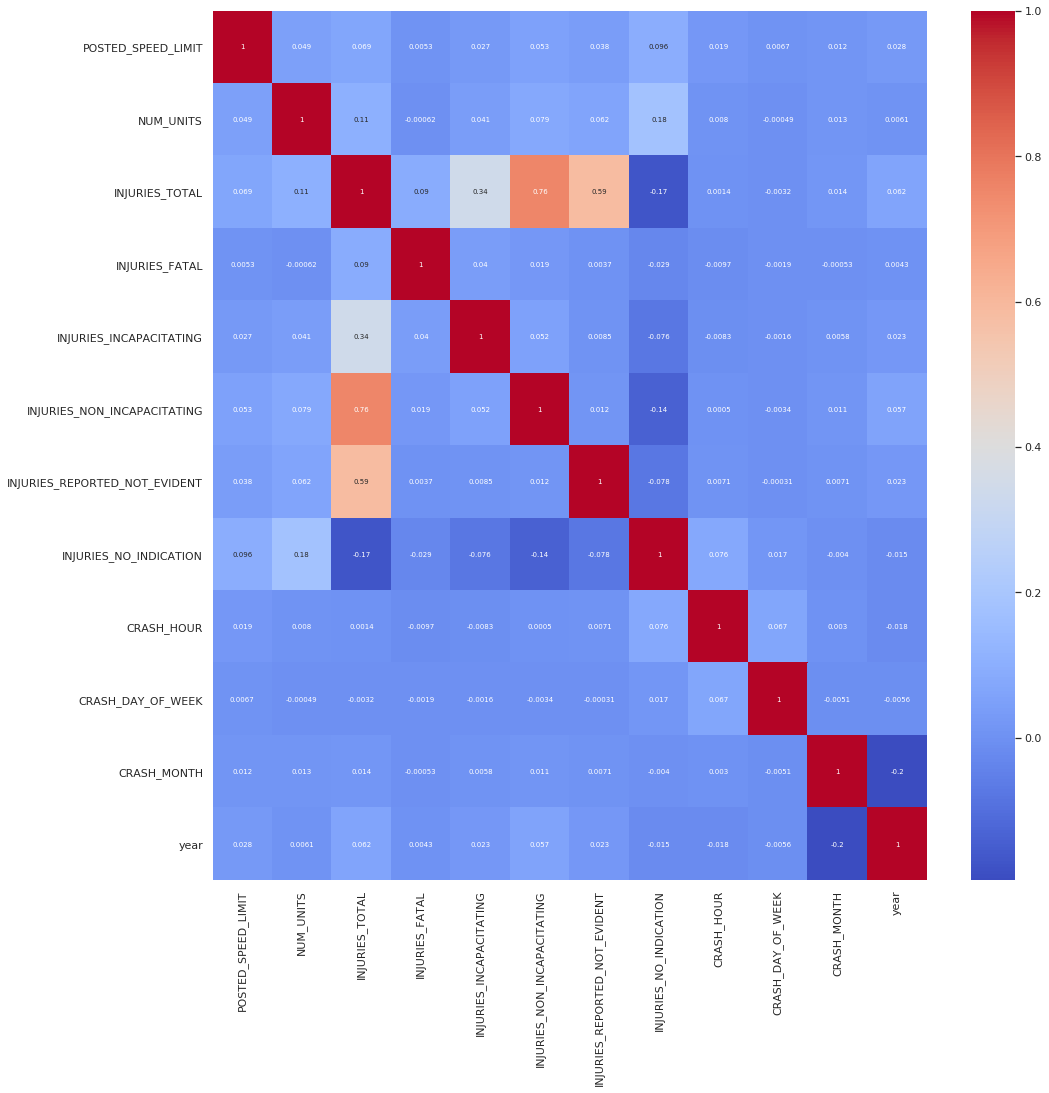

In [83]:
import matplotlib.pyplot as plt

df2_corr = df2.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(df2_corr, annot=True,annot_kws={"size":7}, cmap = 'coolwarm')

#### We used the boxplot below to identify our target variable. Based on the plot, you can see there are many outliers, so we will need to perform a log transformation.

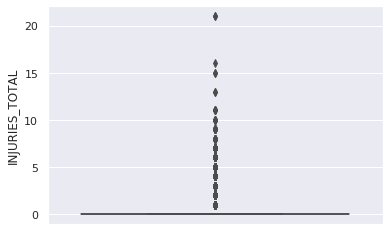

In [84]:
sns.boxplot(y=df2.INJURIES_TOTAL)

In [85]:
# Create Target Variable
def are_there_injuries(total_injuries):
    if (total_injuries != np.nan):
        return True if total_injuries > 0 else False
    else:
        return np.nan

df2['injuries'] = df2['INJURIES_TOTAL'].apply(lambda x: are_there_injuries(x))

In [86]:
df2.head()


,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,year,injuries
CRASH_DATE,,,,,,,,,,,,,,
2013-03-03 16:48:00,30,1712,2.0,2.0,0.0,0.0,0.0,2.0,1.0,16,1,3,2013,True
2014-01-18 18:14:00,30,121,2.0,0.0,0.0,0.0,0.0,0.0,2.0,18,7,1,2014,False
2014-01-21 07:40:00,30,334,2.0,1.0,0.0,0.0,1.0,0.0,1.0,7,3,1,2014,True
2014-02-24 19:45:00,30,1222,2.0,0.0,0.0,0.0,0.0,0.0,2.0,19,2,2,2014,False
2014-06-25 19:00:00,30,1031,2.0,0.0,0.0,0.0,0.0,0.0,2.0,19,4,6,2014,False


### Logistic Regression Model
Below we will use the LRM to predict the low price. We also utilize the ShuffleSplit function in order to randomly sample our entire dataset during each iteration to generate a training set and a test set.

In [87]:
#Logistic Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit


#### Below is an example using the ShuffleSplit by using 3 iterations to generate the training/test set

In [89]:
#create the split
df3 = df2.drop(['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_NO_INDICATION', 'INJURIES_INCAPACITATING',
                'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT'], axis=1)
injuries = df3[['injuries']]
nums = df3.select_dtypes(['float64', 'int64'])
onehotencoded = pd.get_dummies(df3.select_dtypes('category'))
final_set = pd.concat([injuries, nums, onehotencoded], axis=1)
y = final_set['injuries']
X = final_set.drop(['injuries'], axis=1)

                         


In [93]:
final_set.shape

(377630, 281)

In [97]:
import time
import matplotlib.pyplot as plt
from multiprocessing import cpu_count
from src.tuning import clfHyperFit, logUniform
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression() 

iter_num=3

cores = cpu_count() - 1
idx = X.index.to_series()

grid = logUniform(0.01,5).rvs(size=10)

tss = TimeSeriesSplit(n_splits = 5)
classifier = LogisticRegression(max_iter=1000)
gs = GridSearchCV(classifier, param_grid = {'C':grid}, cv = tss, scoring = 'neg_log_loss',
                            n_jobs=cores, n_iter=5)
start=time.time()
gs.fit(X, y)
end=time.time()

end-start


ImportError: attempted relative import with no known parent package

We successfully used the LRM and ShuffleSplit to get 3 iterations of random samples for train/test dataset. We used the LRM on the train model to get the test set of predictions. Then we identified the accuracy for each iteration and inserted a confusion matrix for the train/set dataset.
As you can see above, the accuracy for each iteration is > ??%.

## Support Vector Machine Model

In [ ]:
import time

#SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC(kernel='rbf', C=1, random_state=0)
SVMtime_start = time.time()
model.fit(X_train,y_train)
SVMtime_end = time.time()
SVMtime = (SVMtime_end - SVMtime_start)

C:\Users\Dil Jay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10], 'gamma': [0.1]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

### Model Advantages

In [ ]:
print ("Logistic regression time: {} vs SVM time {}".format(logTime,SVMtime))